In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/gaonk/OneDrive/Desktop/ML/MLPractice/ML Dataset/ML Dataset/Bengaluru_House_Data.csv")
print(data.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [3]:
print(data.describe())

               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


In [4]:
print(data.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [5]:
pd.DataFrame(data['total_sqft']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,total_sqft
count,13320
unique,2117
top,1200
freq,843


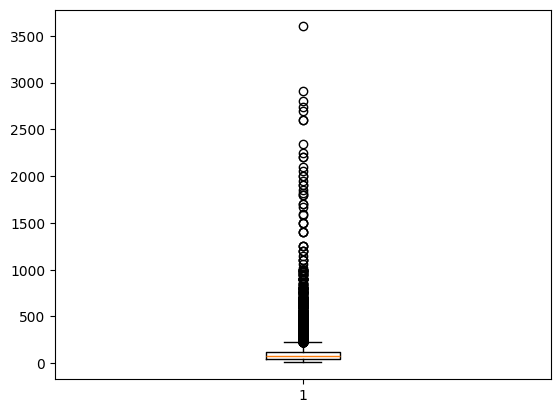

In [7]:
plt.boxplot(data['price'])
plt.show()

In [9]:
median_price = data['price'].median()
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data.loc[data['price'] > upper_bound , 'price'] = data['price'].quantile(0.90)
data.loc[data['price'] < lower_bound , 'price'] = data['price'].quantile(0.01)

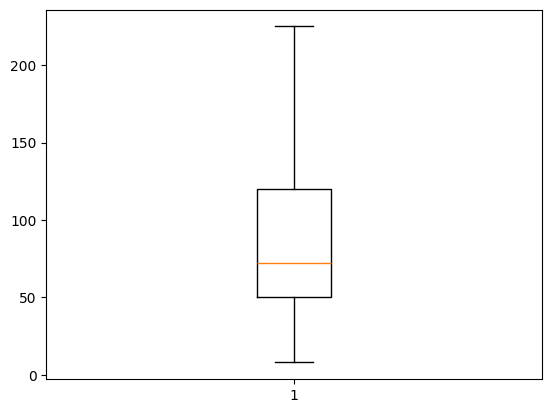

In [11]:
plt.boxplot(data['price'])
plt.show()

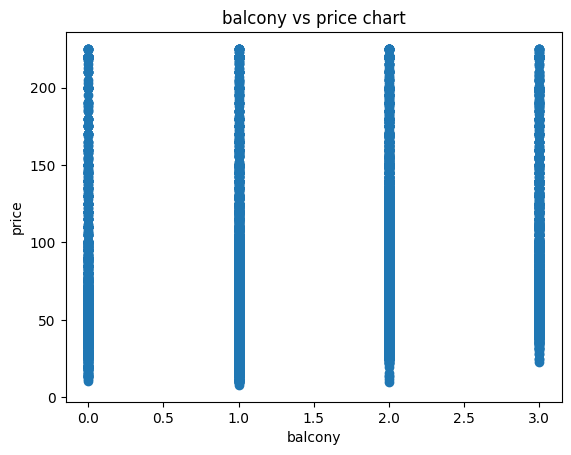

In [13]:
x = data["balcony"]
y=  data["price"]
plt.scatter(x, y)
plt.title('balcony vs price chart')
plt.xlabel('balcony')
plt.ylabel('price')
plt.show()

C:\Users\gaonk\AppData\Local\Temp\ipykernel_18328\850031759.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

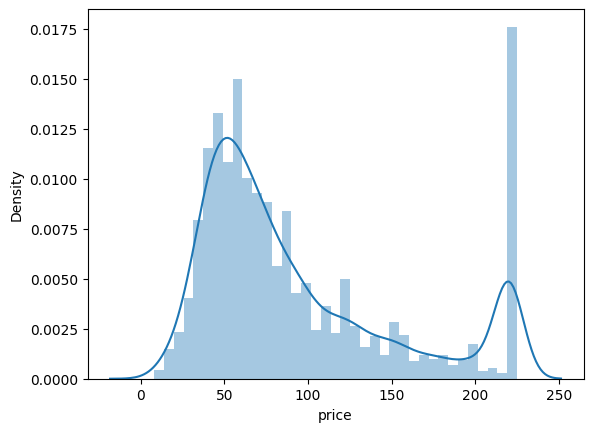

In [14]:
sns.distplot(data['price']) 

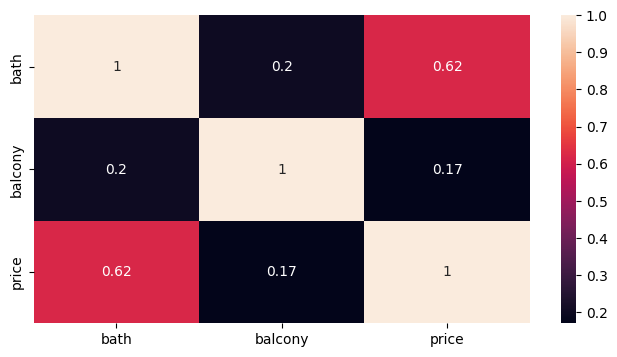

In [16]:
correlation_matrix = data.select_dtypes(include=['int64', 'float64']).apply(pd.to_numeric, errors='coerce').corr().round(2)
plt.figure(figsize=(8, 4))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = ["bath", "balcony"]
response = ["price"]
data_scaled = pd.DataFrame(scaler.fit_transform(data[features]), columns=features)
data_scaled[response] = data[response]


x = data_scaled[features]
y = data_scaled[response]

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
x_imputed = imputer.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.1, random_state=0)

model = LinearRegression().fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

Accuracy on test data: 40.90%


In [19]:
import numpy as np
from sklearn import metrics

y_pred = model.predict(x_test)

print('R2_score:', metrics.r2_score(y_pred, y_test))
print('MSE:', metrics.mean_squared_error(y_pred, y_test))

R2_score: -0.7000052651570632
MSE: 2010.126512966012
